# **Assignment 2, Machine Learning 2020**

> Nicolas Barrera Boada, nibarrerabo@unal.edu.co

> Diego Useche Reyes, diusecher@unal.edu.co

> Sneyder Gantiva, esgantivar@unal.edu.co



## References

[Understanding Gaussian Classifier](https://medium.com/swlh/understanding-gaussian-classifier-6c9f3452358f)

The solution of problem 2 is a modified version of the notebook winery-classification-bivariate from the course of EdX of University of California SanDiego by professor Sanjoy Dasgupta

[Machine Learning Fundamentals](https://www.edx.org/course/machine-learning-fundamentals-2)

The solution of problem 3 is a modified version of the notebook perceptron at work from the same course. 

Problem 5 from both notebooks as well.

Problem 2(c) The code for the ROC curves are a modified version of, 

[Receiver Operating Characteristic (ROC)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

## Librerias Usadas

In [0]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

## Problema 1(a)

Download the Pima Indians Diabetes dataset. Load the dataset as a numpy arrays. The outcome column corresponds to the class label, the other columns to input features.

In [0]:
# Data Upload as pandas
git_raw_url_dataset = "https://raw.githubusercontent.com/esgantivar/ml-datasets/master/diabetes.csv"
diabetes_df = pd.read_csv(git_raw_url_dataset)
print(diabetes_df.shape) #(768, 9)

(768, 9)


In [0]:
# Data Upload as numpy

git_raw_url_dataset = "https://raw.githubusercontent.com/esgantivar/ml-datasets/master/diabetes.csv"
diabetes = np.genfromtxt( git_raw_url_dataset ,delimiter=',')
diabetes = np.delete(diabetes, (0), axis=0)
print(diabetes.shape)

(768, 9)


## Problema 1(b)

Split the dataset in training and validation using the following scikit-learn command:
train_test_split(X, y, test_size=0.33, random_state=42)
where X and y are the input features and labels respectively.

In [0]:
# Split the Data as pandas
X = diabetes_df[diabetes_df.columns[0:8]]
y = diabetes_df['Outcome']
data_train, data_validation, target_train, target_validation = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
# Split the data as numpy

featurenames = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',
                'Insulin'	,'BMI',	'DiabetesPedigreeFunction',	'Age']

trainx, testx, trainy, testy = train_test_split(diabetes[:, 0:8], diabetes[:, 8], test_size=0.33, random_state=42)

print(len(trainy))
print(len(testy))

514
254


In [0]:
# Names of features
features = X.columns
print(features)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [0]:
data_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37
766,1,126,60,0,0,30.1,0.349,47
570,3,78,70,0,0,32.5,0.270,39


In [0]:
target_train.head()

464    0
223    0
393    0
766    1
570    0
Name: Outcome, dtype: int64

In [0]:
target_validation

668    0
324    0
624    0
690    0
473    0
      ..
311    0
429    1
182    0
586    1
679    0
Name: Outcome, Length: 254, dtype: int64

## Problema 1(c)

For each one of the 8 input features build a univariate Gaussian classifier estimating
the parameters using the training dataset and evaluating the classifier in the validation
dataset. For each classifier write down the parameters. Report accuracy, precision and
recall. Which classifier is the best? For this classifier draw the curves for the posterior
distribution for each class and show where the decision boundary is.

Calculate the estimators of means and variance using the training set, value 0 and result 1 are discriminated

In [0]:
parameters = {}
for f in features:
  df = pd.concat([data_train[f], target_train],axis=1,join='inner')
  parameters[f] = {
      0:{
          'mean': df[df['Outcome'] == 0][f].mean(),
          'var': df[df['Outcome'] == 0][f].var(),
      },
      1:{
          'mean': df[df['Outcome'] == 1][f].mean(),
          'var': df[df['Outcome'] == 1][f].var()
      }
  }

In [0]:
'''
  function to given dataframe with outcome and predited class, calculate confusion matrix values
'''
def get_indicators(df):
  tp, tn, fp, fn, p, n = 0, 0, 0, 0, 0, 0
  for (index, row) in df.iterrows():
    if row['Outcome'] == 1:
      p += 1
      if row['Predicted'] == 1:
        tp += 1
      elif row['Predicted'] == 0:
        fn += 1
    elif row['Outcome'] == 0:
      n += 1
      if row['Predicted'] == 0:
        tn += 1
      elif row['Predicted'] == 1:
        fp += 1
  return tp, tn, fp, fn, p, n, (tp + tn + fp + fn)


In [0]:
# classifier function 
for f in parameters:
  # calulate probability distribution of 0 and 1 classes, given mean and variance estimators
  dist_0 = norm(parameters[f][0]['mean'],np.sqrt(parameters[f][0]['var']))
  dist_1 = norm(parameters[f][1]['mean'],np.sqrt(parameters[f][1]['var']))
  predicted = []
  df = pd.concat([data_validation[f], target_validation],axis=1,join='inner')
  p = np.array([len(target_train[target_train == c])/len(target_train) for c in target_train.unique()])
  df[df['Outcome'] == 1]
  predicted = []
  for (index, row) in df.iterrows():
    # calculate a posterior likelihood
    scores = [dist_0.pdf(row[f]) * p[0], dist_1.pdf(row[f]) * p[1]]
    # classifier compare values of likelihood of probability distribution of classes
    predicted.append(np.argmax(scores))
  df['Predicted'] = predicted
  tp, tn, fp, fn, p, n, total = get_indicators(df)
  parameters[f]['result'] = {
      'TP': tp,
      'TN': tn,
      'FP': fp,
      'FN': fn,
      'p':p,
      'n':n
  }

  parameters[f]['measures'] = {
      'accuracy': (tp + tn)/total,
      'recall': tp/p,
      'precision': tp /(tp + fp) if (tp + fp) > 0 else 0
  }

In [0]:
# Create a dataset with parameters, matrix confussion values and measures
data = {}
for f in parameters:
  data[f] = [
       parameters[f][0]['mean'],
       parameters[f][0]['var'],
       parameters[f][1]['mean'],
       parameters[f][1]['var'],
       parameters[f]['result']['TP'],
       parameters[f]['result']['TN'],
       parameters[f]['result']['FP'],
       parameters[f]['result']['FN'],
       parameters[f]['measures']['accuracy'],
       parameters[f]['measures']['recall'],
       parameters[f]['measures']['precision']
  ]

results = pd.DataFrame.from_dict(data, orient='index',
                       columns=['mean_0', 'var_0', 'mean_1', 'var_1', 'TP', 'TN', 'FP', 'FN','accuracy', 'recall', 'precision'])

In [0]:
results

,mean_0,var_0,mean_1,var_1,TP,TN,FP,FN,accuracy,recall,precision
Pregnancies,3.304217,9.009892,4.653846,12.780068,29,149,19,57,0.700787,0.337209,0.604167
Glucose,109.734940,636.841918,142.384615,1110.713132,38,145,23,48,0.720472,0.441860,0.622951
BloodPressure,68.382530,314.520902,72.906593,330.726034,2,166,2,84,0.661417,0.023256,0.500000
SkinThickness,19.822289,213.246269,21.807692,288.531874,2,165,3,84,0.657480,0.023256,0.400000
Insulin,67.213855,8960.706394,101.170330,20767.457015,14,154,14,72,0.661417,0.162791,0.500000
BMI,30.138554,52.379778,35.310440,52.671548,19,149,19,67,0.661417,0.220930,0.500000
DiabetesPedigreeFunction,0.434973,0.096720,0.542621,0.147084,13,162,6,73,0.688976,0.151163,0.684211
Age,30.743976,128.710689,37.653846,123.652996,14,143,25,72,0.618110,0.162791,0.358974


According to the indicators, the function with the best classification function is **Glucose** with MLE parameters

$$ \mu_0 = 109.734940, \; \sigma_0^{2} = 636.841918$$
$$ \mu_1 = 142.384615, \; \sigma_1^{2} = 1110.713132$$







**Measures**

Accuracy: $72.03\%$

Recall: $44.19\%$

Precision: $62.26\%$

**Confusion Matrix**

| | Predicted class| | |
|---|:-:|:-:|:-:|
|**True Class**   |Positive|Negative   |Total|
|Positive|  38 |  48 | 86 |
|Negative|  23 | 145  | 168 | 
|Total| 61  |  193 | 254 |

In [0]:
dist_p0 = norm(results.loc['Glucose','mean_0'], np.sqrt(results.loc['Glucose','var_0']))
dist_p1 = norm(results.loc['Glucose','mean_1'], np.sqrt(results.loc['Glucose','var_1']))

In [0]:
max_glucose = diabetes_df['Glucose'].max()
min_glucose = diabetes_df['Glucose'].min()
f_x = np.arange(min_glucose, 300, (300 - min_glucose)/100).tolist()
p = np.array([len(target_train[target_train == c])/len(target_train) for c in target_train.unique()])
f_y0 = [dist_p0.pdf(i) * p[0] for i in f_x]
f_y1 = [dist_p1.pdf(i) * p[1] for i in f_x]

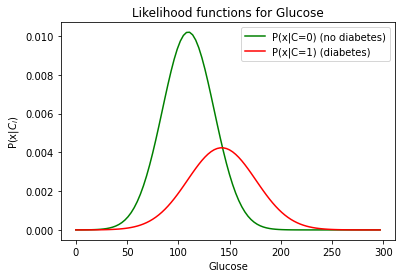

In [0]:
pl.plot(f_x, f_y0, c='g',label='P(x|C=0) (no diabetes)')
pl.plot(f_x, f_y1, c='r',label='P(x|C=1) (diabetes)')
pl.xlabel('Glucose')
pl.ylabel('P(x|$C_i$)')
pl.title('Likelihood functions for Glucose')
pl.legend()

To calculate the posterior likelihood we use the next equation:

$$ P(C_i|x)=\frac{p(x|C_i)\,P(C_i)}{\sum_{k=1}^{K}{p(x|C_i)\,P(C_k)}}$$

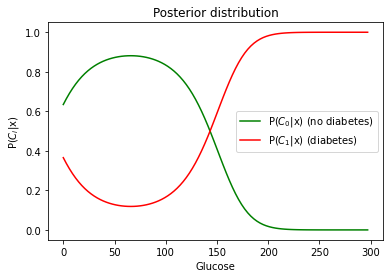

In [0]:
ty0=np.array(f_y0)/(np.array(f_y0) + np.array(f_y1))
ty1=np.array(f_y1)/(np.array(f_y0) + np.array(f_y1))
pl.plot(f_x, ty0, c='g',label='P($C_0$|x) (no diabetes)')
pl.plot(f_x, ty1, c='r',label='P($C_1$|x) (diabetes)')
pl.title('Posterior distribution')
pl.xlabel('Glucose')
pl.ylabel('P($C_i$|x)')
pl.legend()

## Problema 2(a) , 2(b)

Problema 2(a)

In this question, you will take all the combinations of pair of features. For each pair of
features you will model the classes as bivariate Gaussian distributions with a covariance
matrix $\Sigma = I\sigma$, where $\sigma$ is a scalar, shared by all the classes. This is, the distribution
for each class has a diferent mean but the same covariance matrix.

Problema 2(b)

For each combination estimate the parameters using the training dataset and evaluate
the classifier in the validation dataset. Which combination of parameters obtained the
best performance? Report the evaluation results for the best performing combination.


Solution: For this problem we show two models, 

*   model 1: Maximum Likelihood Estimation (MLE)
*   model 2: Optimize Accuracy (OA)



### Model 1: MLE Train

Consider the covariance matrix $\Sigma=I\sigma$, with $\sigma$ a scalar.
We create gaussians and estimate the maximum likelihood, 
The maximum likelihood is given by, 
$$\Phi_T=p_0^np_1^m\frac{1}{(\sqrt{2\pi}\sigma)^{(n+m)}}\prod\exp{\frac{-(\vec{x_{0i}}-\vec{\mu_0})^2}{2\sigma}}\prod\exp{\frac{-(\vec{x_{1i}}-\vec{\mu_1})^2}{2\sigma}}$$

Where, $\vec{x_{0i}}$ correspond to the points of class 0, $\vec{\mu_0}$ correspond to the mean parameter of class 0, $p_0$ the prior of class 0, and $n$ are the number of elements of class 0, $m$ of class 1, and the same for class 1.

By estimating the $\log(\Phi_T)$, the partial derivatives of the log likelihood and equating them to zero, one finds that,

$$\vec{\mu_0}=\frac{\sum\vec{x_{0i}}}{n}$$
$$\vec{\mu_1}=\frac{\sum\vec{x_{1i}}}{m}$$
$$\sigma=\frac{\sum(\vec{x_{0i}}-\vec{\mu_0})^2+\sum(\vec{x_{1i}}-\vec{\mu_1})^2}{m+n}$$

The $\sigma$ can be written in terms of $p_i$ and $\sigma_{ij}$, where $\sigma_{ij}$ is the variance of the feature j in class i,  

Hence, 

$$\sigma= p_0(\sigma_{00}+\sigma_{01})+p_1(\sigma_{10}+\sigma_{11})$$

Then $\sigma$ is some sort of weighted average (center of mass) of the variances of the classes and features.

In [0]:
# Find the mean and the variance of two features, assuming diagonal covariance. 
def fit_diag_gaussian_MLE(x, feature1, feature2):
    features = [feature1, feature2]
    mu = np.mean(x[:,features], axis=0)
    covar = np.array([[np.var(x[:,feature1]), 0],[0, np.var(x[:,feature2])]])
    return mu, covar

In [0]:
# Assumes y takes on values 0,1
def fit_generative_model_MLE(x, y, feature1, feature2):
    features = [feature1, feature2]
    k = 2 # number of classes
    d = len(features) # number of features
    mu = np.zeros((k,d)) # list of means
    covar = np.zeros((k,d,d)) # list of covariance matrices
    pi = np.zeros(k) # list of class weights
    for label in range(k):
        indices = (y==label)
        mu[label,:], covar[label,:,:] = fit_diag_gaussian_MLE(x[indices,:], feature1, feature2)
        pi[label] = float(sum(indices))/float(len(y))
    return mu, covar, pi

In [0]:
def train_model_MLE(f1, f2):
    if f1 == f2: # need f1 != f2
        print("Please choose different features for f1 and f2.")
        return  
    features= [f1,f2]
    mu, covar, pi = fit_generative_model_MLE(trainx, trainy, f1, f2)
    
    k = 2 # Labels 1,2,...,k
    nt = len(trainy) # Number of train points
    # Find the value of sigma
    sigma = 0
    for label in range(k):
      sigma += np.sum(covar[label,:,:])*pi[label]
    
    score = np.zeros((nt,k))
    for i in range(0,nt):
        for label in range(k):
            score[i,label] = np.log(pi[label]) + \
            multivariate_normal.logpdf(trainx[i,features], mean=mu[label,:], cov=sigma)
    predictions = np.argmax(score, axis=1)
    # Finally, tally up score
    errors = np.sum(predictions != trainy)

    accuracy = 1-(errors/nt)
    return mu, sigma, pi, accuracy

In [0]:
# A function which creates the table of sigma and accuracy values for each
# pair of features for the training data set

def train_tables_MLE():
  
  accuracy_table = np.zeros((8,8))
  sigma_table = np.zeros((8,8))
  for i in range(8):
    for j in range(i+1,8):
      mu, sigma_ij, pi, accuracy_ij = train_model_MLE(i, j)
      sigma_table[i,j] = sigma_ij 
      accuracy_table[i,j] = accuracy_ij

  # sigma table
  datatable1 = pd.DataFrame(sigma_table)
  # Change the column names 
  datatable1.columns = featurenames
  # Change the row indexes 
  datatable1.index = featurenames
  datatable1.replace(0, np.nan, inplace=True)
  datatable1.columns.name = 'SIGMA MODEL 1: MLE'


  # accuracy table
  datatable2 = pd.DataFrame(accuracy_table)
  # Change the column names 
  datatable2.columns = featurenames
  # Change the row indexes 
  datatable2.index = featurenames
  datatable2.replace(0, np.nan, inplace=True)
  datatable2.columns.name = 'ACCURACY MODEL 1: MLE'

  return datatable1, datatable2, sigma_table

In [0]:
sigma_table_MLE, accuracy_table_MLE, sigma_table_np = train_tables_MLE()

In [0]:
sigma_table_MLE

SIGMA MODEL 1: MLE,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,811.535444,329.306026,249.230060,13093.772378,62.581173,10.416543,136.731316
Glucose,NaN,NaN,1120.236542,1040.160576,13884.702894,853.511689,801.347059,927.661832
BloodPressure,NaN,NaN,NaN,557.931158,13402.473476,371.282271,319.117641,445.432414
SkinThickness,NaN,NaN,NaN,NaN,13322.397510,291.206305,239.041675,365.356449
Insulin,NaN,NaN,NaN,NaN,NaN,13135.748624,13083.583993,13209.898767
BMI,NaN,NaN,NaN,NaN,NaN,NaN,52.392788,178.707562
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.542932
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
accuracy_table_MLE

ACCURACY MODEL 1: MLE,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,0.754864,0.643969,0.645914,0.655642,0.677043,0.647860,0.663424
Glucose,NaN,NaN,0.752918,0.756809,0.661479,0.758755,0.754864,0.752918
BloodPressure,NaN,NaN,NaN,0.645914,0.655642,0.651751,0.643969,0.642023
SkinThickness,NaN,NaN,NaN,NaN,0.655642,0.649805,0.645914,0.643969
Insulin,NaN,NaN,NaN,NaN,NaN,0.655642,0.655642,0.655642
BMI,NaN,NaN,NaN,NaN,NaN,NaN,0.659533,0.653696
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.663424
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hence the best pair of features for training are (Glucose, BMI), with, 

$$\sigma_{\text{MLE}}=853.511689$$
And accuracy in the training data set of 75.87%

### Model 1: MLE Test

In [0]:
# Now test the performance of a predictor based on a subset of features
def test_model_MLE(f1, f2):
    if f1 == f2: # need f1 != f2
        print("Please choose different features for f1 and f2.")
        return  
    features= [f1,f2]
    mu, covar_0, pi, accuracy  = train_model_MLE(f1, f2)

    errors_0 = len(testy) + 1
    k = 2 # Labels 1,2,...,k
    nt = len(testy) # Number of train points
    score = np.zeros((nt,k))
    for i in range(0,nt):
        for label in range(k):
            score[i,label] = np.log(pi[label]) + \
            multivariate_normal.logpdf(testx[i,features], mean=mu[label,:], cov=covar_0, allow_singular=True)
    predictions = np.argmax(score[:,0:2], axis=1)
    # Finally, tally up score
    errors = np.sum(predictions != testy)
    if errors < errors_0:
      errors_0 = errors

    accuracy = 1-(errors_0/nt)
    return accuracy, score

In [0]:
accuracy_MLE, _ = test_model_MLE(1, 5)
accuracy_MLE

0.7283464566929134

Hence the model bivariate gaussian with features (Glucouse, BMI) and $\sigma = 853.5116 $

Gives an accuracy on the test data set of 72.83%

### Conclusion 

For the maximum likelihood model the results are:

*   best pair of features: (Glucouse, BMI)
*   $\sigma_{\text{MLE}}=853.511689$
*   Accuracy on (train, test) = (75.87%,72.83%) 
*   $\mu = \begin{bmatrix} \mu_{\text{glucose_0}} & \mu_{\text{bmi_0}} \\ \mu_{\text{glucose_1}} & \mu_{\text{bmi_1}} \end{bmatrix} = \begin{bmatrix} 109.73493976 &  30.13855422 \\ 142.38461538 &  35.31043956 \end{bmatrix} $
*   $\vec{p}= (0.6459144, 0.3540856)$

We conclude that our final result for sigma is, 

$$\sigma=853.511689$$






## Problema 2(c)

Draw ROC curves for the best performing univariate model (from question 1) and bivariate model. Which model is better? Explain the results.

In [0]:
accuracy_roc, score_roc = test_model_MLE(1, 5)

In [0]:
def positive_score(score_p):
  nt = len(testy)
  score_pdf = np.exp(score_p)
  score_pdf = score_pdf/score_pdf.sum(axis=1).reshape((nt,1))
  return score_pdf[:,1]

In [0]:
positive_score_t = positive_score(score_roc)

In [0]:
def roc_estimation(testy_p, positive_score_p, title_roc='ROC curve : MLE Model(Glucouse, BMI)'):
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  fpr[0], tpr[0], _ = roc_curve(testy_p, positive_score_p)
  #fpr[i], tpr[i], _ = roc_curve(testy, predictions_roc)
  roc_auc[0] = auc(fpr[0], tpr[0])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(testy.ravel(), positive_score_p.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  plt.figure()
  lw = 2
  plt.plot(fpr[0], tpr[0], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title_roc)
  plt.legend(loc="lower right")
  plt.show()

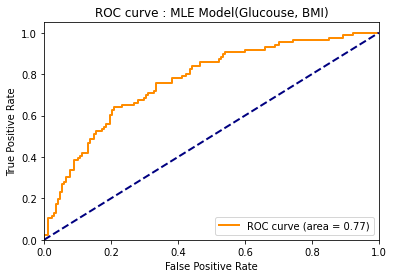

In [0]:
roc_estimation(testy, positive_score_t)

In [0]:
def univariate_gaussian_classifier(means, vars, apriori, data, target):
  c_0 = np.array(norm.pdf(data, means[0], vars[0])) * apriori[0]
  c_1 = np.array(norm.pdf(data, means[1], vars[1])) * apriori[1]
  df = pd.concat([data, target], axis=1, join='inner')
  df['c_0'] = c_0
  df['c_1'] = c_1
  predicted = []
  scores = []
  for i in range(len(c_0)):
    s = [c_0[i], c_1[i]]
    scores.append(s)
    predicted.append(np.argmax(s))
  df['predicted'] = predicted
  confussion = {
      'TP': 0,
      'FP': 0,
      'TN': 0,
      'FN': 0
  }
  for (index, row) in df.iterrows():
    outcome = row['Outcome']
    c = row['predicted']
    if outcome == 1:
      if c == 1:
        confussion['TP'] += 1
      else:
        confussion['FN'] += 1
    elif outcome == 0:
      if c == 1:
        confussion['FP'] += 1
      else:
        confussion['TN'] += 1
  accuracy = (confussion['TP'] + confussion['TN'])/ len(target)
  return accuracy, confussion, np.array(scores)

  

In [0]:
means_univariate = [results.loc['Glucose','mean_0'], results.loc['Glucose','mean_1']]
vars_univariate = [np.sqrt(results.loc['Glucose','var_0']), np.sqrt(results.loc['Glucose','var_1'])]
apriori_univariate = np.array([len(target_train[target_train == c])/len(target_train) for c in target_train.unique()])
accuracy_uv, confusion_uv, scores_uv = univariate_gaussian_classifier(means_univariate, vars_univariate, apriori_univariate, data_validation['Glucose'], target_validation)

In [0]:
scores_uv = scores_uv/scores_uv.sum(axis=1).reshape(len(target_validation),1)


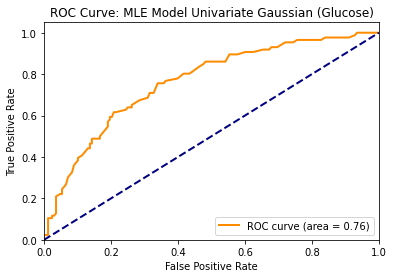

In [0]:
roc_estimation(testy, scores_uv[:,1], title_roc='ROC Curve: MLE Model Univariate Gaussian (Glucose)')

### **Discuss**
According to the ROC curves, the best model is the bivariate Gaussian using the Glucose and BMI characteristics, a measure that allows us to conclude this is the ROC area, which is slightly higher in the bivariate model in comparison with the univariate model, additionally the bivariate model has greater accuracy on test data.

## Problema  3(a)

For the best bivariate model (from question 2) draw a plot, where the regions corresponding to the two classes are shown with diferent colors. A region corresponding to a class is the set of points where the particular class discriminant function is maximum

In [0]:
def evaluate_classifier(mu_p, covar_p, pi_p, x_p, model_p = 'model MLE'):
    k = 2 # number of classes
    score = np.zeros(k)
    if (model_p == 'model MLE'):
      for label in range(k):
        score[label] = np.log(pi_p[label]) + \
                multivariate_normal.logpdf(x_p, mean=mu_p[label,:], cov=covar_p, allow_singular=True)
        prediction = np.argmax(score)
    elif (model_p == 'model risk'):
      score[0] = np.log(2*pi_p[1]) + \
              multivariate_normal.logpdf(x_p, mean=mu_p[1,:], cov=covar_p, allow_singular=True)
      score[1] = np.log(pi_p[0]) + \
              multivariate_normal.logpdf(x_p, mean=mu_p[0,:], cov=covar_p, allow_singular=True)
      prediction = np.argmin(score)
    if prediction == 0:
      return -1
    if prediction == 1:
      return 1

In [0]:
def plot_test(f1, f2, sigma):
    
    features = [f1, f2]
    # select the test data set with the two features
    x = testx[:,features]
    y = testy
    # find the mu and pi with the training data set
    mu, covar, pi = fit_generative_model_MLE(trainx, trainy, f1, f2)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 10
    x1max = max(x[:,0]) + 10
    x2min = min(x[:,1]) - 10
    x2max = max(x[:,1]) + 10
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==0),0], x[(y==0),1], 'k^')
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([evaluate_classifier(mu, sigma, pi, x) for x in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    pl.xlabel(featurenames[f1])
    pl.ylabel(featurenames[f2])
    pl.title('Decision boundaries applied on test data of the two features, C0 black, C1 red, green(diabetes)')
    plt.show()

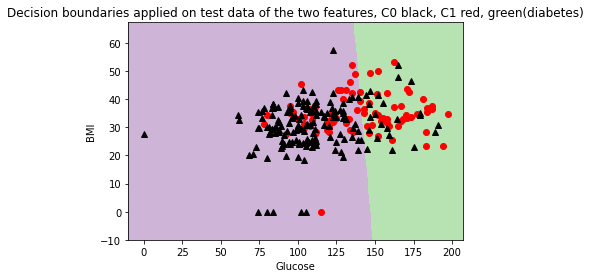

In [0]:
plot_test(1, 5, 853.511689)

## Problema 3(b)

The boundary between class regions must be a line. Calculate the equation of this line
clearly explaining the deduction process. Draw the line along with the regions.

### Deduction of the line 

The equation of the line is given by, 

$$(\vec{\mu_1}-\vec{\mu_0})\cdot\vec{x}= \sigma^2\log(p_0/p_1)+\frac{(\vec{\mu_1}-\vec{\mu_0})\cdot(\vec{\mu_1}+\vec{\mu_0})}{2}$$

Where $\vec{\mu_i}$ and $p_i$ are the mean vector and prior probability of class $i$. And $\vec{x}= (x_1, x_2)$

Proof: 

The probability of class $i$ for any point in the space $\vec{x}$ is given by
$$\Phi_i=\frac{p_i}{\sqrt{2\pi}\sigma}e^{-(\frac{(\vec{x}-\vec{\mu_i})^2}{2\sigma^2})}$$

In the boundary $\Phi_0=\Phi_1$, which leads, to, 

$$2\sigma^2\log(p_0/p_1)=(\vec{x}-\vec{\mu_0})^2-(\vec{x}-\vec{\mu_1})^2$$

But, 

$$(\vec{x}-\vec{\mu_0})^2-(\vec{x}-\vec{\mu_1})^2= (\vec{\mu_1}-\vec{\mu_0})\cdot(2\vec{x}-(\vec{\mu_1}+\vec{\mu_0}))$$

Hence, 

$$2\sigma^2\log(p_0/p_1)= (\vec{\mu_1}-\vec{\mu_0})\cdot(2\vec{x}-(\vec{\mu_1}+\vec{\mu_0}))$$

From the last equation the equation of the line follows.

In our data the equation is, 

$$32.64x+5.17y=4798$$

In [0]:
# Create the function of the line between the boundaries

def boundary_line(mu_p, sigma_p, pi_p): 
  a = mu_p[1,0]-mu_p[0,0]
  b = mu_p[1,1]-mu_p[0,1]
  c = sigma_p*np.log(pi_p[0]/pi_p[1])+0.5*np.dot(mu_p[1,:]-mu_p[0,:],mu_p[1,:]+mu_p[0,:])

  return a, b, c

In [0]:
def plot_test2(f1, f2, sigma, model_p = 'model MLE'):
    
    features = [f1, f2]
    # select the test data set with the two features
    x = testx[:,features]
    y = testy
    # find the mu and pi with the training data set
    mu, covar, pi = fit_generative_model_MLE(trainx, trainy, f1, f2)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 10
    x1max = max(x[:,0]) + 10
    x2min = min(x[:,1]) - 10
    x2max = max(x[:,1]) + 10
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==0),0], x[(y==0),1], 'k^')
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([evaluate_classifier(mu, sigma, pi, x, model_p) for x in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    pl.xlabel(featurenames[f1])
    pl.ylabel(featurenames[f2])
    if (model_p == 'model MLE'):
      pl.title('Decision boundaries applied on test data with the decision line(blue) Model MLE')
    elif (model_p == 'model risk'):
      pl.title('Decision boundaries for the (1,2) risk model: diabetes in green, blue(line of assuming same risk (1,1) for each class)')
    #plt.show()

    return mu, pi, pl, x2min, x2max

In [0]:
def plot_line(f1, f2, sigma_p, model_p = 'model MLE'):
  
  mu, pi, bound_plot, x2min, x2max = plot_test2(f1, f2, sigma_p,  model_p)
  a, b, c = boundary_line(mu, sigma_p, pi)

  y = np.linspace(x2min, x2max, num = 50)
  x = (-b/a)*y+(c/a)
  bound_plot.plot(x,y,linewidth=3.0)
  bound_plot.show()

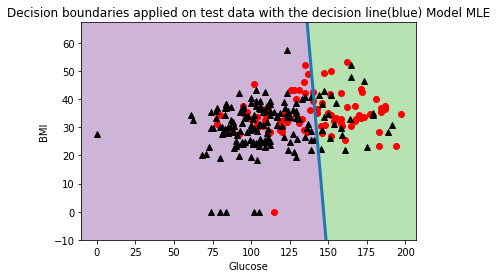

In [0]:
plot_line(1, 5, 853.511689)

In [0]:
mu_line, _ , pi_line = fit_generative_model_MLE(trainx, trainy, 1, 5)
boundary_line(mu_line, 853.511689, pi_line )


(32.64967562557925, 5.171885343572086, 4798.128208125643)

Hence the line is, 

$$32.64x+5.17y=4798$$

## Problem 4(a)

Repeat the previous question, but this time build a model that minimizes the risk. In this case consider that the cost of a false negative is 2, the cost of a false positive is 1 and the cost of a correct classification is 0. Compare with previous model. Discuss

The expected risk for taking action $\alpha_i$ is
$$ R(\alpha_i | x) = \sum_{k=1}^{K} {\lambda_{ik} P(C_k |x)}$$
and we choose the action with minimum risk. 

choose $\alpha_i$ if $ R(\alpha_i|x) = min_{k}{R(\alpha_k|x)}$

define risk assignment

$$\lambda_{ik} = \begin{cases}{0 \; \text{if} \, i == k\\ 2 \; \text{if} \, i = 0\, \text{and}\, k=1\\ 1  \; \text{if} \, i = 1\, \text{and}\, k=0}\end{cases} $$

$\lambda_{ik}$ as the loss incurring for taking action $\alpha_i$ when the input actually belongs to $C_k$ 

$$R(\alpha_i|x)\,=\,(\lambda_{i0}\,P(C_0|x))\,+\,(\lambda_{i1}\,P(C_1|x))$$

(1)
$$R(\alpha_0|x)\,=\,(\lambda_{00}\,P(C_0|x))\,+\,(\lambda_{01}\,P(C_1|x))$$

$$R(\alpha_1|x)\,=\,(\lambda_{10}\,P(C_0|x))\,+\,(\lambda_{11}\,P(C_1|x))$$

(2)
$$R(\alpha_0|x)\,=\,(\lambda_{01}\,P(C_1|x))$$

$$R(\alpha_1|x)\,=\,(\lambda_{10}\,P(C_0|x))$$


(3)
$$R(\alpha_0|x)\,=\,2\,P(C_1|x)$$

$$R(\alpha_1|x)\,=\,P(C_0|x)$$

Given the equation 3, we proceed to find the $\sigma$ which minimizes the risk. 

To classify class 0, we would need that, $R(\alpha_0|x) < R(\alpha_1|x)$, that is $2P(C_1|x) < P(C_0|x)$, which is $-P(C_0|x) < -2P(C_1|x))$, and multiplying by $(-1)$ we get that, 

$$P(C_0|x) > 2P(C_1|x))$$

And to classify as class 1, 

$$P(C_0|x) < 2P(C_1|x))$$


Hence we can say that the risk minimization can be turned to the usual maximization where the data with diabetes have double probability, meaning we have to make sure that a person with mild syntoms of diabetes is classified with diabetes.

Hence we can write a density function similar as in problem 3 but doubling the probability of the points with diabetes,

The maximum likelihood is given by, 
$$\Phi_T=p_0^n2^mp_1^{m}\frac{1}{(\sqrt{2\pi}\sigma)^{(n+m)}}\prod\exp{\frac{-(\vec{x_{0i}}-\vec{\mu_0})^2}{2\sigma}}\prod\exp{\frac{-(\vec{x_{1i}}-\vec{\mu_1})^2}{2\sigma}}$$

Where, $\vec{x_{0i}}$ correspond to the points of class 0, $\vec{\mu_0}$ correspond to the mean parameter of class 0, $p_0$ the prior of class 0, and $n$ are the number of elements of class 0, $m$ of class 1, and the same for class 1.

By estimating the $\log(\Phi_T)$, the partial derivatives of the log likelihood and equating them to zero, one finds that,

$$\vec{\mu_0}=\frac{\sum\vec{x_{0i}}}{n}$$
$$\vec{\mu_1}=\frac{\sum\vec{x_{1i}}}{m}$$
$$\sigma=\frac{\sum(\vec{x_{0i}}-\vec{\mu_0})^2+\sum(\vec{x_{1i}}-\vec{\mu_1})^2}{m+n}$$

The $\sigma$ can be written in terms of $\sigma_{ij}$, where $\sigma_{ij}$ is the variance of the feature j in class i, and the priors $p_i$, 

Hence, 

$$\sigma= p_0(\sigma_{00}+\sigma_{01})+p_1(\sigma_{10}+\sigma_{11})$$

In conclusion , $\sigma$ is some sort of weighted average (center of mass), and we have the same parameters as in problem 2, that is because even though the probability duplicates the variance stays the same for class 1. 

Hence ,  $\vec{\mu_1}$,  $\vec{\mu_2}$ are the actual averages, and $\sigma = 853.5116$ as in problem 2.

We calculate MLE for all features on dataset

In [0]:
estimators = {}
for f in features:
  df_tmp = pd.concat([data_train[f], target_train], axis=1, join='inner')
  classes = df_tmp['Outcome'].unique()
  estimators[f] = {}
  for c in classes:        
    df_tmp[f][df_tmp['Outcome'] == c]
    estimators[f][f'mean_{c}'] = df_tmp[f][df_tmp['Outcome'] == c].mean()
    estimators[f][f'var_{c}'] = df_tmp[f][df_tmp['Outcome'] == c].var()

df_estimators = pd.DataFrame.from_dict(estimators, orient='index')

In [0]:
df_estimators

,mean_0,var_0,mean_1,var_1
Pregnancies,3.304217,9.009892,4.653846,12.780068
Glucose,109.734940,636.841918,142.384615,1110.713132
BloodPressure,68.382530,314.520902,72.906593,330.726034
SkinThickness,19.822289,213.246269,21.807692,288.531874
Insulin,67.213855,8960.706394,101.170330,20767.457015
BMI,30.138554,52.379778,35.310440,52.671548
DiabetesPedigreeFunction,0.434973,0.096720,0.542621,0.147084
Age,30.743976,128.710689,37.653846,123.652996


Select **Glucose** and **BMI**

In [0]:
glucose = df_estimators.loc['Glucose', :]
bmi = df_estimators.loc['BMI', :]

Build a vector of estimated means $\vec{\mu_1}$ y  $\vec{\mu_2}$

In [0]:
mean_0 = np.array([glucose['mean_0'], bmi['mean_0']])
mean_1 = np.array([glucose['mean_1'], bmi['mean_1']])

Build a vector of apriori likelihood $\vec{p}$ and $\sigma$ estimators

In [0]:
p = np.array([len(target_train[target_train == c])/len(target_train) for c in target_train.unique()])

In [0]:
p

array([0.6459144, 0.3540856])

In [0]:
sigma_4 = 853.511689
sigma_4

853.511689

Hence,

$$\sigma = 853.5116$$

Calculate the values of likelihood in distributions for data validation subset 

In [0]:
c_0 = np.array(multivariate_normal.pdf(data_validation[['Glucose','BMI']], mean=mean_0, cov=np.sum(sigma_4),allow_singular=True)*p[0])
c_1 = np.array(multivariate_normal.pdf(data_validation[['Glucose','BMI']], mean=mean_1, cov=np.sum(sigma_4),allow_singular=True)*p[1])

Build a dataframe with values of features, calculated likelihood and Outcome

In [0]:
t = pd.concat([data_validation[['Glucose', 'BMI']], target_validation], axis=1, join='inner')
t['c_0'] = c_0
t['c_1'] = c_1

Add column of predicted label, based on functions showed in eq (3). Where the selected label criteria is based on selecting the value with the lowest risk

In [0]:
predicted = []
scores_risk = []
for i in range(len(c_0)):
  scores = [2 * c_1[i], c_0[i]]
  #scores = [c_1[i], c_0[i]]
  scores_risk.append(scores)
  predicted.append(np.argmin(scores))
t['predicted'] = predicted

In [0]:
t.head()

,Glucose,BMI,Outcome,c_0,c_1,predicted
668,98,34.0,0,0.000110,0.000021,0
324,112,35.7,0,0.000118,0.000038,0
624,108,30.8,0,0.000120,0.000033,0
690,107,24.6,0,0.000118,0.000030,0
473,136,29.9,0,0.000080,0.000063,1


Calculate the confusion matrix values

In [0]:
confussion = {
    'TP': 0,
    'FP': 0,
    'TN': 0,
    'FN': 0
}

for (index, row) in t.iterrows():
  outcome = row['Outcome']
  c = row['predicted']
  if outcome == 1:
    if c == 1:
      confussion['TP'] += 1
    else:
      confussion['FN'] += 1
  elif outcome == 0:
    if c == 1:
      confussion['FP'] += 1
    else:
      confussion['TN'] += 1

accuracy_risk = (confussion['TP'] + confussion['TN'])/ len(target_validation)

In [0]:
confussion

{'FN': 28, 'FP': 48, 'TN': 120, 'TP': 58}

**Confusion Matrix for Test Validation**

| | Predicted class| | |
|---|:-:|:-:|:-:|
|**True Class**   |Positive|Negative   |Total|
|Positive|  58 |  28 | 86 |
|Negative|  48 | 120  | 168 | 
|Total| 104  |  150 | 254 |


Accuracy on validation set: $70.08\%$

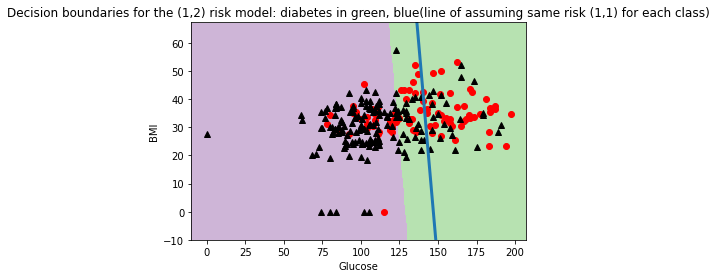

In [0]:
plot_line(1, 5, sigma_4, 'model risk')

### Conclusion

For this problem we obtained,

*   $\sigma=853.5116$
*   Accuracy on test data 70.08%
*   $\vec{\mu_1}$, $\vec{\mu_2}$ are the actual averages

In comparison with problem 2, this model has less accuracy because of the risk actions. In this model there are more false positive(as shown in the boundary plot) in comparison with problem 1 and 2(Blue boundary decision of model of problem 2)because there is a cost 2 of not having diabetes.

## Problem 4(b) 

Calculate the ROC curve for this model and compare with the ROC curves from question 2. Discuss.

In [0]:
nt_risk = len(target_validation)
score_risk = np.array(scores_risk)

In [0]:
score_p_risk = score_risk/score_risk.sum(axis=1).reshape((nt_risk,1))

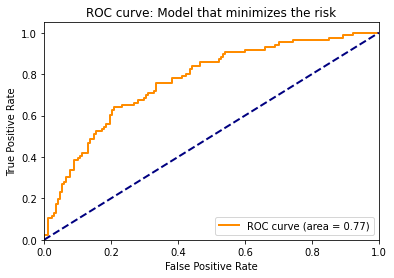

In [0]:
roc_estimation(testy, score_p_risk[:,0], title_roc='ROC curve: Model that minimizes the risk')

### **Discuss**

The ROC curve of problem 2 and problem 4 are the same because the risk model is a (1,2) cost threadshold, and the model of problem two is equivalent to a (1,1) risk model, and the ROC curve plots the FPR and TPR for all posibilities of costs. 


With respect to the ROC curve of the univariate model, we see that the model based on minimizing risk has an improvement, since its precision measurements and the area under the curve are a little bit smaller for the univariate model.

## Problema 5(a)

Using the best combination of parameters found in question 2 build a bivariate classifier,
but this time the covariance matrix could be an arbitrary matrix (not diagonal) and
different for each class.

In [0]:
# Find the mean and the covariance of two features. 
def fit_gaussian(x, feature1, feature2):
    features = [feature1, feature2]
    mu = np.mean(x[:,features], axis=0)
    covar = np.cov(x[:,features], rowvar=0, bias=1)
    return mu, covar

In [0]:
# Assumes y takes on values 0,1
def fit_gaussian_model(x, y, feature1, feature2):
    features = [feature1, feature2]
    k = 2 # number of classes
    d = len(features) # number of features
    mu = np.zeros((k,d)) # list of means
    covar = np.zeros((k,d,d)) # list of covariance matrices
    pi = np.zeros(k) # list of class weights
    for label in range(k):
        indices = (y==label)
        mu[label,:], covar[label,:,:] = fit_gaussian(x[indices,:], feature1, feature2)
        pi[label] = float(sum(indices))/float(len(y))
    return mu, covar, pi

In [0]:
mu_trained, covar_trained, pi_trained = fit_gaussian_model(trainx, trainy, 1, 5)

print('The optimized mean is:')
print(mu_trained)
print('The optimized covariance matrix for class 0 is:')
print(covar_trained[0,:,:])
print('The optimized covariance matrix for class 1 is:')
print(covar_trained[1,:,:])

The optimized mean is:
[[109.73493976  30.13855422]
 [142.38461538  35.31043956]]
The optimized covariance matrix for class 0 is:
[[634.92371897  12.95509871]
 [ 12.95509871  52.22200755]]
The optimized covariance matrix for class 1 is:
[[1104.61031276    5.87895182]
 [   5.87895182   52.38214376]]


In [0]:
def test_gaussian_model(f1, f2):
    if f1 == f2: # need f1 != f2
        print("Please choose different features for f1 and f2.")
        return  
    features= [f1,f2]
    mu, covar_0, pi = fit_gaussian_model(trainx, trainy, f1, f2)

    errors_0 = len(testy) + 1
    k = 2 # Labels 1,2,...,k
    nt = len(testy) # Number of train points
    score = np.zeros((nt,k))
    for i in range(0,nt):
        for label in range(k):
            score[i,label] = np.log(pi[label]) + \
            multivariate_normal.logpdf(testx[i,features], mean=mu[label,:], cov=covar_0[label,:,:], allow_singular=True)
    predictions = np.argmax(score[:,0:2], axis=1)
    # Finally, tally up score
    errors = np.sum(predictions != testy)
    if errors < errors_0:
      errors_0 = errors

    accuracy = 1-(errors_0/nt)
    return accuracy, errors

In [0]:
test_gaussian_model(1, 5)

(0.7519685039370079, 63)

Hence the results for the bivariate normal distribution (arbitrary covariance matrices and different for each class) are:



*   Accuracy on test data set = 75.19% 
*   $\mu = \begin{bmatrix} \mu_{\text{glucose_0}} & \mu_{\text{bmi_0}} \\ \mu_{\text{glucose_1}} & \mu_{\text{bmi_1}} \end{bmatrix} = \begin{bmatrix} 109.73493976 &  30.13855422 \\ 142.38461538 &  35.31043956 \end{bmatrix} $
*   $\sigma_0 = \begin{bmatrix} 634.92371897 &  12.95509871 \\ 12.95509871 &  52.22200755 \end{bmatrix} $
*   $\sigma_1 = \begin{bmatrix} 1104.61031276  &  5.87895182 \\ 5.87895182 &  52.38214376 \end{bmatrix} $
*   $\vec{p}= (0.6459144, 0.3540856)$

## Problema 5(b)

Draw the regions corresponding to each class. Compare with the regions obtained in
question 3. Discuss.

In [0]:
def evaluate_classifier_gaussian(mu_p, covar_p, pi_p, x_p):
    k = 2 # number of classes
    score = np.zeros(k)
    for label in range(k):
      score[label] = np.log(pi_p[label]) + \
              multivariate_normal.logpdf(x_p, mean=mu_p[label,:], cov=covar_p[label,:,:], allow_singular=True)
      prediction = np.argmax(score[0:2])
    if prediction == 0:
      return -1
    if prediction == 1:
      return 1

In [0]:
def plot_test_gaussian(f1, f2):
    
    features = [f1, f2]
    # select the test data set with the two features
    x = testx[:,features]
    y = testy
    # find the mu and pi with the training data set
    mu, covar, pi = fit_gaussian_model(trainx, trainy, f1, f2)
    # mu, covar, pi = fit_generative_model(trainx, trainy, f1, f2)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 10
    x1max = max(x[:,0]) + 10
    x2min = min(x[:,1]) - 10
    x2max = max(x[:,1]) + 10
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==0),0], x[(y==0),1], 'k^')
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([evaluate_classifier_gaussian(mu, covar, pi, x) for x in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    pl.xlabel(featurenames[f1])
    pl.ylabel(featurenames[f2])
    pl.title('Gaussian boundaries applied on test data of the two features, C0 black, C1 red, green(diabetes)')
    plt.show()

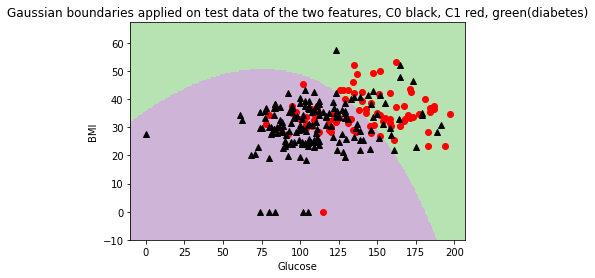

In [0]:
plot_test_gaussian(1, 5)

Discuss: 

The Model of problem 5 has 75.2% of accuracy which is greater than the model of problem 2 (72.83%) on test data, that happens because model of problem 5 is more flexible. Moreover, the decision boundary of the model of problem 5 is not a line as in problem 3, that is because the covariance matrices of the two classes in problem 5 are different.

## Problem 5(c)

Add the possibility of rejection to your model. Draw the three regions corresponding to
both classes and rejection. Discuss.

We define an aditional action of reject $\alpha_{k+1}$ with $\alpha_i, i=1,...,K$ being the usual actions of deciding on classes $C_i, i=1,....,K$

A possible loss funtcion is 

$$\lambda_{ik} = \begin{cases}{0 \; \text{if} \, i = k\\ \lambda \; \text{if} \, i = K+1\, \\ 1  \; \text{otherwise} }\end{cases} $$

Where $0<\lambda < 1 $ is the loss incurred for choosing the (K+1)st  action reject. Then the risk of reject is 
$$R(\alpha_{K+1}|x)=\sum_{k=1}^{K}\lambda P(C_k|x)=\lambda$$

And the risk of choosing class $C_i$ is

$$R(\alpha_{i}|x)=\sum_{k \neq i}^{K} P(C_k|x)= 1-P(C_i|x)$$

The optimal decision rule is to

* choose $C_i$ if:
$P(C_i|x)>P(C_k|x)$ for all $k \neq i$ and
$P(C_i|x)>1-\lambda$
* reject: otherwise


In [0]:
def evaluate_classifier_gaussian_rejection(mu_p, covar_p, pi_p, x_p, rej_c):
    reject=np.log(1-rej_c) #rejection 
    k = 2 # number of classes
    score = np.zeros(k)
    for label in range(k):
      score[label] =  np.log(pi_p[label]) + \
              multivariate_normal.logpdf(x_p, mean=mu_p[label,:], cov=covar_p[label,:,:], allow_singular=True)
      prediction = np.argmax(score[0:2])
    if prediction == 0 and score[0]>reject:
      return -1
    elif prediction == 1 and score[1]>reject:
      return 1
    else:
      return -2

In [0]:
def evaluate_rej(a,rej_c):
    prediction = np.argmax(a)
    reject=np.log(1-rej_c)
    if prediction == 0 and a[0]>reject:
      return 0
    elif prediction == 1 and a[1]>reject:
      return 1
    else:
      return 2   

def test_gaussian_model_rej(f1, f2):
    features= [f1,f2]
    mu, covar_0, pi = fit_gaussian_model(trainx, trainy, f1, f2)
    errors_0 = len(testy) + 1
    k = 2 # Labels 1,2,...,k
    nt = len(testy) # Number of train points
    score = np.zeros((nt,k))
    for i in range(0,nt):
        for label in range(k):
            score[i,label] = np.log(pi[label]) + \
            multivariate_normal.logpdf(testx[i,features], mean=mu[label,:], cov=covar_0[label,:,:], allow_singular=True)
 
    predictions = np.array([evaluate_rej(x, rej_c) for x in score[:,0:2]])
    # Finally, tally up score
    nt_2=np.count_nonzero(predictions == 0)+np.count_nonzero(predictions == 1)
    accerts = np.sum(predictions == testy)
    errors=nt_2-accerts
    rejects= np.count_nonzero(predictions == 2)
    por_rej=rejects/nt
    if errors < errors_0:
      errors_0 = errors

    accuracy = 1-(errors_0/nt_2)
    return accuracy, errors, por_rej

In [0]:
def plot_test_gaussian_reject(f1, f2):
    
    features = [f1, f2]
    # select the test data set with the two features
    x = testx[:,features]
    y = testy
    # find the mu and pi with the training data set
    mu, covar, pi = fit_gaussian_model(trainx, trainy, f1, f2)
    # mu, covar, pi = fit_generative_model(trainx, trainy, f1, f2)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 10
    x1max = max(x[:,0]) + 10
    x2min = min(x[:,1]) - 10
    x2max = max(x[:,1]) + 10
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==0),0], x[(y==0),1], 'k^')
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([evaluate_classifier_gaussian_rejection(mu, covar, pi, x, rej_c) for x in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    pl.xlabel(featurenames[f1])
    pl.ylabel(featurenames[f2])
    pl.title('Gaussian boundaries applied on test data of the two features, C0 black, C1 red, green(diabetes), dark violet(reject)')
    plt.show()

In [0]:
rej_c=0.99994
test_gaussian_model_rej(1, 5)

(0.7672413793103449, 54, 0.08661417322834646)

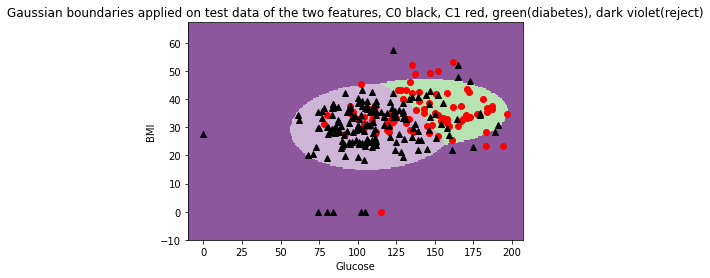

In [0]:
plot_test_gaussian_reject(1, 5)

Discuss:

The Model of problem 5 with rejection has 76.7% of accuracy which is greater than the model without rejection (75.2%) on test data, that happens because model rejects data far away from centroids. Moreover, the difference is only 1.5% and the rejected cases are 8.1%, so the accuracy increase is not significant considering the cases that are rejected.

## Additional

This is not part of the solution of the assignment, it just shows the inicial approach (probably incorrect) of problem 4 , and problem 2 which is a model which estimates sigma based on optimizing accuracy.

### Problem 4(a) Version 2

Repeat the previous question, but this time build a model that minimizes the risk. In this case consider that the cost of a false negative is 2, the costo of a false positive is 1 and the cost of a correct classification is 0. Compare with previous model. Discuss

The expected risk for taking action $\alpha_i$ is
$$ R(\alpha_i | x) = \sum_{k=1}^{K} {\lambda_{ik} P(C_k |x)}$$
and we choose the action with minimum risk. 

choose $\alpha_i$ if $ R(\alpha_i|x) = min_{k}{R(\alpha_k|x)}$

define risk assignment

$$\lambda_{ik} = \begin{cases}{0 \; \text{if} \, i == k\\ 2 \; \text{if} \, i = 0\, \text{and}\, k=1\\ 1  \; \text{if} \, i = 1\, \text{and}\, k=0}\end{cases} $$

$\lambda_{ik}$ as the loss incurring for taking action $\alpha_i$ when the input actually belongs to $C_k$ 



$$R(\alpha_i|x)\,=\,(\lambda_{i0}\,P(C_0|x))\,+\,(\lambda_{i1}\,P(C_1|x))$$

(1)
$$R(\alpha_0|x)\,=\,(\lambda_{00}\,P(C_0|x))\,+\,(\lambda_{01}\,P(C_1|x))$$

$$R(\alpha_1|x)\,=\,(\lambda_{10}\,P(C_0|x))\,+\,(\lambda_{11}\,P(C_1|x))$$

(2)
$$R(\alpha_0|x)\,=\,(\lambda_{01}\,P(C_1|x))$$

$$R(\alpha_1|x)\,=\,(\lambda_{10}\,P(C_0|x))$$


(3)
$$R(\alpha_0|x)\,=\,2\,P(C_1|x)$$

$$R(\alpha_1|x)\,=\,P(C_0|x)$$


Given the equation 3, we proceed to find the $\sigma$ which minimizes the risk. 

To classify class 0, we would need that, $R(\alpha_0|x) < R(\alpha_1|x)$, that is $2P(C_1|x) < P(C_0|x)$, which is $-P(C_0|x) < -2P(C_1|x))$, and multiplying by $(-1)$ we get that, 

$$P(C_0|x) > 2P(C_1|x))$$

And to classify as class 1, 

$$P(C_0|x) < 2P(C_1|x))$$


Hence we can say that the risk minimization can be turned to the usual maximization where double weight is given to data with diabetes, meaning we have to make sure that a person with mild syntoms of diabetes is classified with diabetes, we can do that by giving double the weight in the density function for points with diabetes, or in other terms duplicating the points with diabetes.

Hence we can write a density function similar as in problem 3 but doubling the points with diabetes,

The maximum likelihood is given by, 
$$\Phi_T=p_0^np_1^{2m}\frac{1}{(\sqrt{2\pi}\sigma)^{(n+2m)}}\prod\exp{\frac{-(\vec{x_{0i}}-\vec{\mu_0})^2}{2\sigma}}\Big(\prod\exp{\frac{-(\vec{x_{1i}}-\vec{\mu_1})^2}{2\sigma}}\Big)^2$$

Where, $\vec{x_{0i}}$ correspond to the points of class 0, $\vec{\mu_0}$ correspond to the mean parameter of class 0, $p_0$ the prior of class 0, and $n$ are the number of elements of class 0, $m$ of class 1, and the same for class 1.

By estimating the $\log(\Phi_T)$, the partial derivatives of the log likelihood and equating them to zero, one finds that,

$$\vec{\mu_0}=\frac{\sum\vec{x_{0i}}}{n}$$
$$\vec{\mu_1}=\frac{\sum\vec{x_{1i}}}{m}$$
$$\sigma=\frac{\sum(\vec{x_{0i}}-\vec{\mu_0})^2+2\sum(\vec{x_{1i}}-\vec{\mu_1})^2}{2m+n}$$

The $\sigma$ can be written in terms of $\sigma_{ij}$, where $\sigma_{ij}$ is the variance of the feature j in class i, and the priors $p_i$, 

Hence, 

$$\sigma= \frac{p_0(\sigma_{00}+\sigma_{01})+2p_1(\sigma_{10}+\sigma_{11})}{p_0+2p_1}$$

In conclusion , $\sigma$ is some sort of weighted average (center of mass) which favors the elements to be classified as with diabetes , class 1







We calculate MLE for all features on dataset



In [0]:
estimators = {}
for f in features:
  df_tmp = pd.concat([data_train[f], target_train], axis=1, join='inner')
  classes = df_tmp['Outcome'].unique()
  estimators[f] = {}
  for c in classes:        
    df_tmp[f][df_tmp['Outcome'] == c]
    estimators[f][f'mean_{c}'] = df_tmp[f][df_tmp['Outcome'] == c].mean()
    estimators[f][f'var_{c}'] = df_tmp[f][df_tmp['Outcome'] == c].var()

df_estimators = pd.DataFrame.from_dict(estimators, orient='index')

In [0]:
df_estimators

,mean_0,var_0,mean_1,var_1
Pregnancies,3.304217,9.009892,4.653846,12.780068
Glucose,109.734940,636.841918,142.384615,1110.713132
BloodPressure,68.382530,314.520902,72.906593,330.726034
SkinThickness,19.822289,213.246269,21.807692,288.531874
Insulin,67.213855,8960.706394,101.170330,20767.457015
BMI,30.138554,52.379778,35.310440,52.671548
DiabetesPedigreeFunction,0.434973,0.096720,0.542621,0.147084
Age,30.743976,128.710689,37.653846,123.652996


Select **Glucose** and **BMI**

In [0]:
glucose = df_estimators.loc['Glucose', :]
bmi = df_estimators.loc['BMI', :]

Build a vector of estimated means $\vec{\mu_1}$ y  $\vec{\mu_2}$



In [0]:
mean_0 = np.array([glucose['mean_0'], bmi['mean_0']])
mean_1 = np.array([glucose['mean_1'], bmi['mean_1']])

Build a vector of apriori likelihood $\vec{p}$ and $\sigma$ estimators

In [0]:
p = np.array([len(target_train[target_train == c])/len(target_train) for c in target_train.unique()])

In [0]:
p

array([0.6459144, 0.3540856])

In [0]:
sigma_0 = np.sum(np.multiply([[glucose['var_0'], 0],[0, bmi['var_0']]], p[0]))
sigma_1 = np.sum(np.multiply([[glucose['var_1'], 0],[0, bmi['var_1']]], p[1]))

In [0]:
sigma_0

445.1782157593427

In [0]:
sigma_1

411.93776608551707

In [0]:
sigma_4 = (sigma_0 + 2*sigma_1)/(p[0]+2*p[1])

In [0]:
sigma_4
  

937.2034862589277

Hence,

$$\sigma = 937.2034$$

Calculate the values of likelihood in distributions for data validation subset 

In [0]:
c_0 = np.array(multivariate_normal.pdf(data_validation[['Glucose','BMI']], mean=mean_0, cov=np.sum(sigma_4),allow_singular=True)*p[0])
c_1 = np.array(multivariate_normal.pdf(data_validation[['Glucose','BMI']], mean=mean_1, cov=np.sum(sigma_4),allow_singular=True)*p[1])


Build a dataframe with values of features, calculated likelihood and Outcome

In [0]:
t = pd.concat([data_validation[['Glucose', 'BMI']], target_validation], axis=1, join='inner')
t['c_0'] = c_0
t['c_1'] = c_1

Add column of predicted label, based on functions showed in eq (3). Where the selected label criteria is based on selecting the value with the lowest risk

In [0]:
predicted = []
scores_risk = []
for i in range(len(c_0)):
  scores = [2 * c_1[i], c_0[i]]
  #scores = [c_1[i], c_0[i]]
  scores_risk.append(scores)
  predicted.append(np.argmin(scores))
t['predicted'] = predicted
  

In [0]:
t.head()

,Glucose,BMI,Outcome,c_0,c_1,predicted
668,98,34.0,0,0.000101,0.000021,0
324,112,35.7,0,0.000108,0.000037,0
624,108,30.8,0,0.000109,0.000032,0
690,107,24.6,0,0.000107,0.000029,0
473,136,29.9,0,0.000076,0.000058,1


Calculate the confusion matrix values

In [0]:
confussion = {
    'TP': 0,
    'FP': 0,
    'TN': 0,
    'FN': 0
}

for (index, row) in t.iterrows():
  outcome = row['Outcome']
  c = row['predicted']
  if outcome == 1:
    if c == 1:
      confussion['TP'] += 1
    else:
      confussion['FN'] += 1
  elif outcome == 0:
    if c == 1:
      confussion['FP'] += 1
    else:
      confussion['TN'] += 1

accuracy_risk = (confussion['TP'] + confussion['TN'])/ len(target_validation)


In [0]:
confussion

{'FN': 28, 'FP': 48, 'TN': 120, 'TP': 58}

**Confusion Matrix for Test Validation**

| | Predicted class| | |
|---|:-:|:-:|:-:|
|**True Class**   |Positive|Negative   |Total|
|Positive|  58 |  28 | 86 |
|Negative|  48 | 120  | 168 | 
|Total| 104  |  150 | 254 |


Accuracy on validation set: $70.08\%$

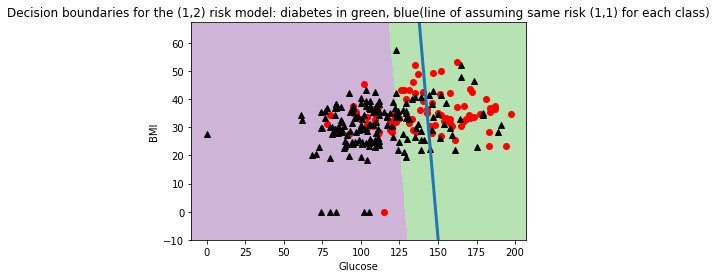

In [0]:
plot_line(1, 5, 937.203486, 'model risk')

Conclusion

For this problem we obtained,

*   $\sigma=937.20$
*   Accuracy on test data 70.08%
*   $\vec{\mu_1}$, $\vec{\mu_2}$ are the actual averages

In comparison with problem 3, this model has less accuracy because of the risk actions. In this model there are more false positive(as shown in the boundary plot) in comparison with problem 1 and 2 because there is a cost 2 of not having diabetes. 

### Problem 4(b) Version 2

Calculate the ROC curve for this model and compare with the ROC curves from question 2. Discuss.


In [0]:
nt_risk = len(target_validation)
score_risk = np.array(scores_risk) 

In [0]:
score_p_risk = score_risk/score_risk.sum(axis=1).reshape((nt_risk,1))

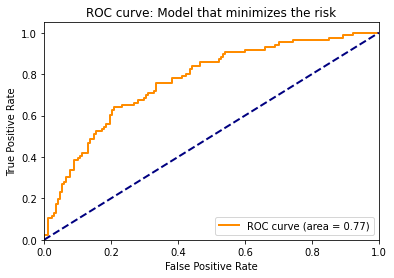

In [0]:
roc_estimation(testy, score_p_risk[:,0], title_roc='ROC curve: Model that minimizes the risk')

### Problem 2 Version 2


#### Model 2: OA Train

In this model we look for the best pair of features which modeled by gaussians give the best accuracy. That is we optimize the accuracy.

In contrast, in the first model we optimized the maximum log likelihood.

In this model we look for the best $\sigma$, but we assume that the $\vec{\mu_i}$ are the actual averages of the distribution. We may look further in this model and change the $\vec{\mu}$ but we did not do it.

In [0]:
# Find the mean and the variance of two features, assuming diagonal covariance. 
def fit_diag_gaussian(x, feature1, feature2):
    features = [feature1, feature2]
    mu = np.mean(x[:,features], axis=0)
    covar = np.array([[np.var(x[:,feature1]), 0],[0, np.var(x[:,feature2])]])
    return mu, covar

In [0]:
f1 = 2
f2 = 3
label = 1
mu, covar = fit_diag_gaussian(trainx[trainy==label,:], f1 , f2 )
print("Mean:\n" + str(mu))
print("Covariance matrix:\n" + str(covar))

Mean:
[72.90659341 21.80769231]
Covariance matrix:
[[328.90885763   0.        ]
 [  0.         286.94653423]]


Define a function that will fit a Gaussian with only diagonal entries generative model to the two classes, restricted to a given list of two features. The function returns:
* `mu`: the means of the Gaussians, one per row
* `covar`: diagonal covariance matrices of each of the Gaussians
* `pi`: list of two class weights summing to 1

In [0]:
# Assumes y takes on values 0,1
def fit_generative_model(x, y, feature1, feature2):
    features = [feature1, feature2]
    k = 2 # number of classes
    d = len(features) # number of features
    mu = np.zeros((k,d)) # list of means
    covar = np.zeros((k,d,d)) # list of covariance matrices
    pi = np.zeros(k) # list of class weights
    for label in range(k):
        indices = (y==label)
        mu[label,:], covar[label,:,:] = fit_diag_gaussian(x[indices,:], feature1, feature2)
        pi[label] = float(sum(indices))/float(len(y))
    return mu, covar, pi

We define the function train_model_3 which takes two features (f1, f2) and the num_points for the number of points in the training.

The function takes the highest and the lowest value of the variances of two clases with the two features, and find the best value of $\sigma$ between these two values.

it returns the mu : the averages of the clases, sigma the optimized value, pi the weights of the classes, the accuracy in the training data set, and table points of the optimization

In [0]:
# Find the best values of variances which give best result for a diagonal 
# covariance matrix with the same diagonal elements

def train_model_3(f1, f2, num_points=100):
    if f1 == f2: # need f1 != f2
        print("Please choose different features for f1 and f2.")
        return  
    features= [f1,f2]
    mu, covar, pi = fit_generative_model(trainx, trainy, f1, f2)
    
    # Find the highest number an the lowest number out of the covariance matrix
    point_h = np.max(covar)
    point_l = np.min(covar[np.nonzero(covar)])

    # create a line of points between min and max
    points_f1 = np.linspace(point_l, point_h, num = num_points)

    errors_0 = len(trainy) + 1
    covar_0 = np.zeros((2,2,2))
    table_points = np.zeros((num_points, 2))
    table_points[:,0] = np.arange(num_points)
    j = 0

    for p_i in points_f1:
      
      k = 2 # Labels 1,2,...,k
      nt = len(trainy) # Number of train points
      score = np.zeros((nt,k))
      for i in range(0,nt):
          for label in range(k):
              score[i,label] = np.log(pi[label]) + \
              multivariate_normal.logpdf(trainx[i,features], mean=mu[label,:], cov=p_i, allow_singular=True)
      predictions = np.argmax(score[:,0:2], axis=1)
      # Finally, tally up score
      errors = np.sum(predictions != trainy)
      if errors < errors_0:
        errors_0 = errors
        covar_0 = p_i

      accuracy_pi = 1-(errors/nt)
      table_points[j,1] = accuracy_pi
      j+=1

    accuracy = 1-(errors_0/nt)
    return mu, covar_0, pi, accuracy, table_points

In [0]:
# A function which creates the table of sigma and accuracy values for each
# pair of features for the training data set

def train_tables():
  
  accuracy_table = np.zeros((8,8))
  sigma_table = np.zeros((8,8))
  for i in range(8):
    for j in range(i+1,8):
      mu, sigma_ij, pi, accuracy_ij, table_ij = train_model_3(i, j)
      sigma_table[i,j] = sigma_ij 
      accuracy_table[i,j] = accuracy_ij

  # sigma table
  datatable1 = pd.DataFrame(sigma_table)
  # Change the column names 
  datatable1.columns = featurenames
  # Change the row indexes 
  datatable1.index = featurenames
  datatable1.replace(0, np.nan, inplace=True)
  datatable1.columns.name = 'SIGMA'


  # accuracy table
  datatable2 = pd.DataFrame(accuracy_table)
  # Change the column names 
  datatable2.columns = featurenames
  # Change the row indexes 
  datatable2.index = featurenames
  datatable2.replace(0, np.nan, inplace=True)
  datatable2.columns.name = 'TRAINING ACCURACY'

  return datatable1, datatable2, sigma_table

In [0]:
sigma_table, accuracy_table, sigma_table_np = train_tables()

In [0]:
sigma_table

SIGMA,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,927.539192,151.172133,65.137052,3345.446164,44.052968,4.683127,99.392036
Glucose,NaN,NaN,1040.688150,951.437505,5285.669244,955.787724,926.103018,1094.694790
BloodPressure,NaN,NaN,NaN,217.303149,3395.357877,113.707974,132.949935,152.095744
SkinThickness,NaN,NaN,NaN,NaN,3309.686711,113.866833,63.840897,132.911339
Insulin,NaN,NaN,NaN,NaN,NaN,3797.881662,3337.996014,3233.636694
BMI,NaN,NaN,NaN,NaN,NaN,NaN,40.234957,53.759401
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.761685
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
accuracy_table

TRAINING ACCURACY,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,0.764591,0.655642,0.655642,0.667315,0.677043,0.671206,0.680934
Glucose,NaN,NaN,0.764591,0.764591,0.680934,0.764591,0.764591,0.762646
BloodPressure,NaN,NaN,NaN,0.655642,0.667315,0.673152,0.651751,0.669261
SkinThickness,NaN,NaN,NaN,NaN,0.665370,0.669261,0.651751,0.673152
Insulin,NaN,NaN,NaN,NaN,NaN,0.665370,0.667315,0.669261
BMI,NaN,NaN,NaN,NaN,NaN,NaN,0.667315,0.710117
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.678988
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def train_plot():
  colors = ['b', 'g', 'r', 'c', 'm', 'y']
  labels = ['Pregnancies', 'BloodPressure',	'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']
  j = 0
  for i in [0, 2, 3, 5, 6]:
  #for i in [0]:
    mu, covar_0, pi, accuracy, table_points_i = train_model_3(1, i)
    pl.plot(table_points_i[:,0], table_points_i[:,1], c=colors[j],label=labels[j])
    j+=1
  pl.xlabel('Number of points')
  pl.title('Training of the accuracy for pairs (Glucose and parameters)')
  pl.legend()

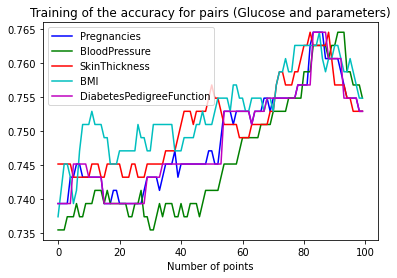

In [0]:
train_plot()

The pairs of features ('Glucose','Pregnancies' ), ('Glucose','BloodPressure' ), ('Glucose','SkinThickness' ), ('Glucose','BMI' ), ('Glucose','DiabetesPedigreeFunction' ) all with Glucose have the same accuracy for the training data set, the training is shown in the following graph.

Given that there are five pairs we choose the pair (Glucose, BMI) once again.

It is expected that this model performs better than the Maximum Likelihood, since the accuracy was optimized and it is our measure of performance

In this model we look for the best pair of features which modeled by gaussians give the best accuracy. That is we optimize the accuracy.

In contrast, in the first model we optimized the maximum log likelihood.

In this model we look for the best $\sigma$, but we assume that the $\vec{\mu_i}$ are the actual averages of the distribution. We may look further in this model and change the $\vec{\mu}$ but we did not do it.

In [0]:
# Find the mean and the variance of two features, assuming diagonal covariance. 
def fit_diag_gaussian(x, feature1, feature2):
    features = [feature1, feature2]
    mu = np.mean(x[:,features], axis=0)
    covar = np.array([[np.var(x[:,feature1]), 0],[0, np.var(x[:,feature2])]])
    return mu, covar

In [0]:
f1 = 2
f2 = 3
label = 1
mu, covar = fit_diag_gaussian(trainx[trainy==label,:], f1 , f2 )
print("Mean:\n" + str(mu))
print("Covariance matrix:\n" + str(covar))

Mean:
[72.90659341 21.80769231]
Covariance matrix:
[[328.90885763   0.        ]
 [  0.         286.94653423]]


Define a function that will fit a Gaussian with only diagonal entries generative model to the two classes, restricted to a given list of two features. The function returns:
* `mu`: the means of the Gaussians, one per row
* `covar`: diagonal covariance matrices of each of the Gaussians
* `pi`: list of two class weights summing to 1

In [0]:
# Assumes y takes on values 0,1
def fit_generative_model(x, y, feature1, feature2):
    features = [feature1, feature2]
    k = 2 # number of classes
    d = len(features) # number of features
    mu = np.zeros((k,d)) # list of means
    covar = np.zeros((k,d,d)) # list of covariance matrices
    pi = np.zeros(k) # list of class weights
    for label in range(k):
        indices = (y==label)
        mu[label,:], covar[label,:,:] = fit_diag_gaussian(x[indices,:], feature1, feature2)
        pi[label] = float(sum(indices))/float(len(y))
    return mu, covar, pi

We define the function train_model_3 which takes two features (f1, f2) and the num_points for the number of points in the training.

The function takes the highest and the lowest value of the variances of two clases with the two features, and find the best value of $\sigma$ between these two values.

it returns the mu : the averages of the clases, sigma the optimized value, pi the weights of the classes, the accuracy in the training data set, and table points of the optimization

In [0]:
# Find the best values of variances which give best result for a diagonal 
# covariance matrix with the same diagonal elements

def train_model_3(f1, f2, num_points=100):
    if f1 == f2: # need f1 != f2
        print("Please choose different features for f1 and f2.")
        return  
    features= [f1,f2]
    mu, covar, pi = fit_generative_model(trainx, trainy, f1, f2)
    
    # Find the highest number an the lowest number out of the covariance matrix
    point_h = np.max(covar)
    point_l = np.min(covar[np.nonzero(covar)])

    # create a line of points between min and max
    points_f1 = np.linspace(point_l, point_h, num = num_points)

    errors_0 = len(trainy) + 1
    covar_0 = np.zeros((2,2,2))
    table_points = np.zeros((num_points, 2))
    table_points[:,0] = np.arange(num_points)
    j = 0

    for p_i in points_f1:
      
      k = 2 # Labels 1,2,...,k
      nt = len(trainy) # Number of train points
      score = np.zeros((nt,k))
      for i in range(0,nt):
          for label in range(k):
              score[i,label] = np.log(pi[label]) + \
              multivariate_normal.logpdf(trainx[i,features], mean=mu[label,:], cov=p_i, allow_singular=True)
      predictions = np.argmax(score[:,0:2], axis=1)
      # Finally, tally up score
      errors = np.sum(predictions != trainy)
      if errors < errors_0:
        errors_0 = errors
        covar_0 = p_i

      accuracy_pi = 1-(errors/nt)
      table_points[j,1] = accuracy_pi
      j+=1

    accuracy = 1-(errors_0/nt)
    return mu, covar_0, pi, accuracy, table_points

In [0]:
# A function which creates the table of sigma and accuracy values for each
# pair of features for the training data set

def train_tables():
  
  accuracy_table = np.zeros((8,8))
  sigma_table = np.zeros((8,8))
  for i in range(8):
    for j in range(i+1,8):
      mu, sigma_ij, pi, accuracy_ij, table_ij = train_model_3(i, j)
      sigma_table[i,j] = sigma_ij 
      accuracy_table[i,j] = accuracy_ij

  # sigma table
  datatable1 = pd.DataFrame(sigma_table)
  # Change the column names 
  datatable1.columns = featurenames
  # Change the row indexes 
  datatable1.index = featurenames
  datatable1.replace(0, np.nan, inplace=True)
  datatable1.columns.name = 'SIGMA'


  # accuracy table
  datatable2 = pd.DataFrame(accuracy_table)
  # Change the column names 
  datatable2.columns = featurenames
  # Change the row indexes 
  datatable2.index = featurenames
  datatable2.replace(0, np.nan, inplace=True)
  datatable2.columns.name = 'TRAINING ACCURACY'

  return datatable1, datatable2, sigma_table

In [0]:
sigma_table, accuracy_table, sigma_table_np = train_tables()

In [0]:
sigma_table

SIGMA,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,927.539192,151.172133,65.137052,3345.446164,44.052968,4.683127,99.392036
Glucose,NaN,NaN,1040.688150,951.437505,5285.669244,955.787724,926.103018,1094.694790
BloodPressure,NaN,NaN,NaN,217.303149,3395.357877,113.707974,132.949935,152.095744
SkinThickness,NaN,NaN,NaN,NaN,3309.686711,113.866833,63.840897,132.911339
Insulin,NaN,NaN,NaN,NaN,NaN,3797.881662,3337.996014,3233.636694
BMI,NaN,NaN,NaN,NaN,NaN,NaN,40.234957,53.759401
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.761685
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
accuracy_table

TRAINING ACCURACY,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,0.764591,0.655642,0.655642,0.667315,0.677043,0.671206,0.680934
Glucose,NaN,NaN,0.764591,0.764591,0.680934,0.764591,0.764591,0.762646
BloodPressure,NaN,NaN,NaN,0.655642,0.667315,0.673152,0.651751,0.669261
SkinThickness,NaN,NaN,NaN,NaN,0.665370,0.669261,0.651751,0.673152
Insulin,NaN,NaN,NaN,NaN,NaN,0.665370,0.667315,0.669261
BMI,NaN,NaN,NaN,NaN,NaN,NaN,0.667315,0.710117
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.678988
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def train_plot():
  colors = ['b', 'g', 'r', 'c', 'm', 'y']
  labels = ['Pregnancies', 'BloodPressure',	'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']
  j = 0
  for i in [0, 2, 3, 5, 6]:
  #for i in [0]:
    mu, covar_0, pi, accuracy, table_points_i = train_model_3(1, i)
    pl.plot(table_points_i[:,0], table_points_i[:,1], c=colors[j],label=labels[j])
    j+=1
  pl.xlabel('Number of points')
  pl.title('Training of the accuracy for pairs (Glucose and parameters)')
  pl.legend()

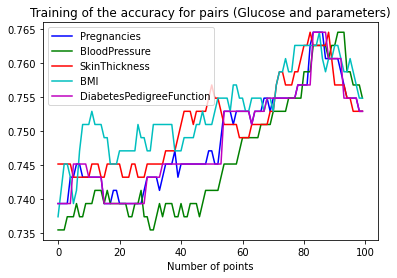

In [0]:
train_plot()

The pairs of features ('Glucose','Pregnancies' ), ('Glucose','BloodPressure' ), ('Glucose','SkinThickness' ), ('Glucose','BMI' ), ('Glucose','DiabetesPedigreeFunction' ) all with Glucose have the same accuracy for the training data set, the training is shown in the following graph.

Given that there are five pairs we choose the pair (Glucose, BMI) once again.

It is expected that this model performs better than the Maximum Likelihood, since the accuracy was optimized and it is our measure of performance

#### Model 2: OA Test

In [0]:
# Now test the performance of a predictor based on a subset of features
def test_model_2(f1, f2):
    if f1 == f2: # need f1 != f2
        print("Please choose different features for f1 and f2.")
        return  
    features= [f1,f2]
    mu, covar_0, pi, accuracy, table_points  = train_model_3(f1, f2)

    errors_0 = len(testy) + 1
    k = 2 # Labels 1,2,...,k
    nt = len(testy) # Number of train points
    score = np.zeros((nt,k))
    for i in range(0,nt):
        for label in range(k):
            score[i,label] = np.log(pi[label]) + \
            multivariate_normal.logpdf(testx[i,features], mean=mu[label,:], cov=covar_0, allow_singular=True)
    predictions = np.argmax(score[:,0:2], axis=1)
    # Finally, tally up score
    errors = np.sum(predictions != testy)
    if errors < errors_0:
      errors_0 = errors

    accuracy = 1-(errors_0/nt)
    return covar_0, accuracy

In [0]:
test_model_2(1, 5)

(955.7877241477701, 0.7244094488188977)

Hence the Model 2: Optimizing the accuracy has the best pair of features (Glucouse, BMI) (between other 5 pairs)

$$\sigma_{\text{OA}}=955.7877$$

with accuracy over the test data of 72.44%


Conclusion 

We have set two models: Model 1, optimizing maximum likelihood (MLE), model 2, optimizing accuracy (OA).

For the maximum likelihood model the results are:

*   best pair of features: (Glucouse, BMI)
*   $\sigma_{\text{MLE}}=853.511689$
*   Accuracy on (train, test) = (75.87%,72.83%) 
*   $\mu = \begin{bmatrix} \mu_{\text{glucose_0}} & \mu_{\text{bmi_0}} \\ \mu_{\text{glucose_1}} & \mu_{\text{bmi_1}} \end{bmatrix} = \begin{bmatrix} 109.73493976 &  30.13855422 \\ 142.38461538 &  35.31043956 \end{bmatrix} $
*   $\vec{p}= (0.6459144, 0.3540856)$

For the model 2 accuracy optimization the results are:

*   best pair of features: (Glucouse, BMI)
*   $\sigma_{\text{OA}}=955.7877$
*   Accuracy on (train, test) = (76.45%,72.44%) 

Same $\mu$ and $\vec{p}$ as model 1.

It is expected that the model 2 performs better on training data, because it optimizes accuracy, but on test data the MLE model outperforms. Hence we conclude that the best model is the model 1, of maximum likelihood estimation. And our final result for sigma is, 

$$\sigma=853.511689$$